In [2]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import time

In [1]:
#pseudocode

function mergeArrays(arr, L, R):
    indexL = 0
    indexR = 0
    newindex = 0

    while indexL < length(L) and indexR < length(R):
        if L[indexL] < R[indexR]:
            arr[newindex] = L[indexL]
            indexL = indexL + 1
        else:
            arr[newindex] = R[indexR]
            indexR = indexR + 1
        newindex = newindex + 1
        comparisons = comparisons + 1

    # append leftover elements from either array after either array is empty
    while indexL < length(L):
        arr[newindex] = L[indexL]
        indexL = indexL + 1
        newindex = newindex + 1

    while indexR < length(R):
        arr[newindex] = R[indexR]
        indexR = indexR + 1
        newindex = newindex + 1

function hybridSort(arr):
    s = small int #set value of S

    if length(arr) > 1:

        if length(arr) <= s:
            insertionSort(arr)

        mid = length(arr) / 2 # get integer value of middle index
        left = arr[0 to mid - 1] # left subarray will be the first half of the array
        hybridSort(left)

        right = arr[mid to end] # right subarray will be the second half of the array
        hybridSort(right)

        mergeArrays(arr, left, right)
        return comparisons

In [25]:
""" 
The idea is to set a small integer S as a threshold for the size of subarrays.
Once the size of a subarray in a recursive call of Mergesort is less than or equal to S,
the algorithm will switch to Insertion Sort, which is efficient for small-sized input
"""

class HybridSort:
    def __init__(self, arr = []):
        self.arr = arr
        self.comparisons = 0
        
    def resetComparisons(self):
        self.comparisons = 0 # to reset key comparison value once array is sorted

    def insertionSort(self, arr):
        if len(arr) < 2:
            return arr

        i = 1
        while i < len(arr):
           #self.comparisons += 1
            if arr[i] < arr[i-1]:
                j = i-1
                while j > 0:
                    self.comparisons += 1
                    if arr[i] > arr[j-1]:
                        break
                    j -= 1
                shiftElement = arr[i] #copy element
                arr[j+1:i+1] = arr[j:i]
                arr[j] = shiftElement
            i += 1
        return self.comparisons 


    def mergeSort(self, arr):
        if len(arr) < 2:
            return arr
        elif len(arr) == 2:
            if arr[0] > arr[1]:
                temp = arr[0]
                arr[0] = arr[1]
                arr[1] = temp #do a swap of 2 elements if they are descending order
            
        mid = len(arr)//2 #get integer value of middle index
        left = arr[:mid] #left subarray will be first half of array
        self.mergeSort(left)

        right = arr[mid:] #right subarray will be second half of array
        self.mergeSort(right)
        
        self.mergeArrays(arr, left, right) 
        
        return self.comparisons

    def mergeArrays(self, arr, L, R):
        indexL = indexR = newindex = 0

        while indexL < len(L) and indexR < len(R):
            if L[indexL] < R[indexR]:
                arr[newindex] = L[indexL] 
                indexL += 1 
            else:
                arr[newindex] = R[indexR]
                indexR += 1
            newindex += 1
            self.comparisons += 1 
  
        # Append leftover elements from either array after either array is empty
        while indexL < len(L):
            arr[newindex] = L[indexL]
            indexL += 1
            newindex += 1
  
        while indexR < len(R):
            arr[newindex] = R[indexR]
            indexR += 1
            newindex += 1

    def hybridSort(self, arr):
        s = 5 #variable
        if len(arr) > 1:
            
            if len(arr) <= s:
                self.insertionSort(arr)
            
            mid = len(arr)//2 #get integer value of middle index
            left = arr[:mid] #left subarray will be first half of array
            self.hybridSort(left)

            right = arr[mid:] #right subarray will be second half of array
            self.hybridSort(right)

            self.mergeArrays(arr, left, right) 
            return self.comparisons

Now, we call a function to generate data of increasing arrays.


In [4]:
def generateData(minsize, maxsize):
    minlimit = 1
    maxlimit = 1000
    
    step = (maxsize - minsize)//12

    
    cursize = minsize
    datasets = {}
    
    while cursize <= maxsize:
        dataset = []
        for x in range (0, cursize):
            dataset.append(random.randint(minlimit, maxlimit))
            datasets[cursize] = dataset #set the key value as array size, item value as array
        cursize += step
        
    if cursize > maxsize:
        datasetMax = []
        for x in range (0, maxsize):
            datasetMax.append(random.randint(minlimit, maxlimit))
            datasets[maxsize] = datasetMax
    '''  
    for size, dataset in datasets.items():
        print(f"Size: {size}, Length: {len(dataset)}") #print key values and length of arrays
    '''      
    
    return datasets

In [21]:
dataset1 = generateData(1000, 100000)
dataset2 = generateData(10000, 10000000)

In [27]:
def run_sorting_algorithm(dataset, runs=10):
    return [HybridSort(list(dataset)).hybridSort(dataset) for x in range(runs)]

Testing each dataset for Hybrid Sort (Key Comparisons and CPU Time)

In [33]:
dataset_sizes = list(dataset1.keys())
avg_comparison_counts = []

for size in dataset_sizes:
    dataset = dataset1[size]
    comparison_counts = run_sorting_algorithm(dataset)
    average_comparisons = sum(comparison_counts) / len(comparison_counts)
    avg_comparison_counts.append(average_comparisons)

    # Print results for each dataset size
    is_sorted = all(dataset[i] <= dataset[i + 1] for i in range(len(dataset) - 1))
    print(f"Dataset Size: {len(dataset)}")
    print(f"Is Sorted: {is_sorted}")
    print(f"Average Number of Comparisons: {average_comparisons}\n")

Dataset Size: 1000
Is Sorted: True
Average Number of Comparisons: 5136.0

Dataset Size: 9250
Is Sorted: True
Average Number of Comparisons: 68297.0

Dataset Size: 17500
Is Sorted: True
Average Number of Comparisons: 139101.0

Dataset Size: 25750
Is Sorted: True
Average Number of Comparisons: 216226.0

Dataset Size: 34000
Is Sorted: True
Average Number of Comparisons: 288507.0

Dataset Size: 42250
Is Sorted: True
Average Number of Comparisons: 372224.0

Dataset Size: 50500
Is Sorted: True
Average Number of Comparisons: 450179.0

Dataset Size: 58750
Is Sorted: True
Average Number of Comparisons: 529311.0

Dataset Size: 67000
Is Sorted: True
Average Number of Comparisons: 601958.0

Dataset Size: 75250
Is Sorted: True
Average Number of Comparisons: 695357.0

Dataset Size: 83500
Is Sorted: True
Average Number of Comparisons: 782689.0

Dataset Size: 91750
Is Sorted: True
Average Number of Comparisons: 866772.0

Dataset Size: 100000
Is Sorted: True
Average Number of Comparisons: 947165.0



Showing it as a graph to visualize it better

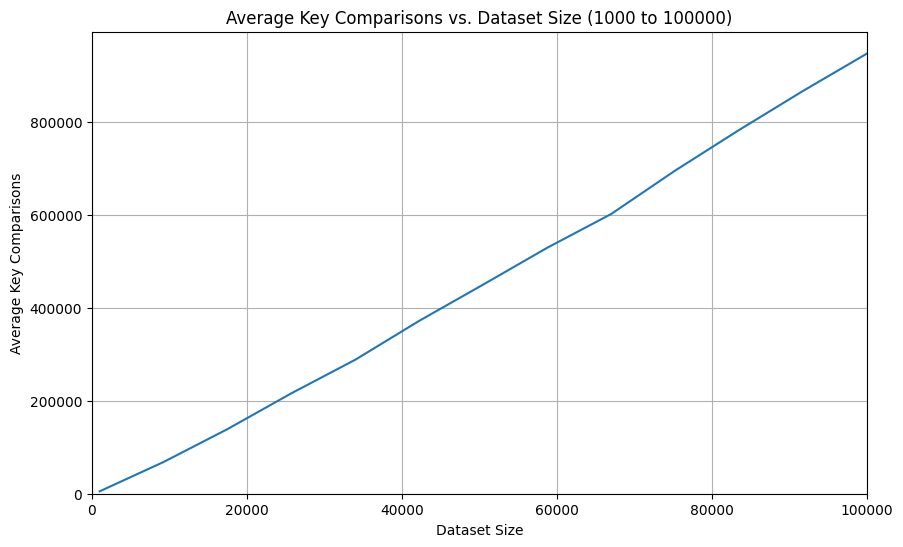

In [34]:
#

#, marker='o', linestyle='-'
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, avg_comparison_counts)
plt.title('Average Key Comparisons vs. Dataset Size (1000 to 100000)')
plt.xlabel('Dataset Size')
plt.ylabel('Average Key Comparisons')
plt.ticklabel_format(style = 'plain')
plt.xlim([0,100000])
plt.ylim(bottom = 0)
plt.grid(True)
plt.show()



In [30]:
dataset_sizes = list(dataset2.keys())
avg_comparison_counts = []

for size in dataset_sizes:
    dataset = dataset2[size]
    comparison_counts = run_sorting_algorithm(dataset)
    average_comparisons = sum(comparison_counts) / len(comparison_counts)
    avg_comparison_counts.append(average_comparisons)

    # Print results for each dataset size
    is_sorted = all(dataset[i] <= dataset[i + 1] for i in range(len(dataset) - 1))
    print(f"Dataset Size: {len(dataset)}")
    print(f"Is Sorted: {is_sorted}")
    print(f"Average Number of Comparisons: {average_comparisons}\n")

Dataset Size: 10000
Is Sorted: True
Average Number of Comparisons: 79816.4

Dataset Size: 842500
Is Sorted: True
Average Number of Comparisons: 9953963.3

Dataset Size: 1675000
Is Sorted: True
Average Number of Comparisons: 20704337.1

Dataset Size: 2507500
Is Sorted: True
Average Number of Comparisons: 31933421.1

Dataset Size: 3340000
Is Sorted: True
Average Number of Comparisons: 43162513.5

Dataset Size: 4172500
Is Sorted: True
Average Number of Comparisons: 53965914.0

Dataset Size: 5005000
Is Sorted: True
Average Number of Comparisons: 66382710.2

Dataset Size: 5837500
Is Sorted: True
Average Number of Comparisons: 78160710.2

Dataset Size: 6670000
Is Sorted: True
Average Number of Comparisons: 89944048.0

Dataset Size: 7502500
Is Sorted: True
Average Number of Comparisons: 101337595.5

Dataset Size: 8335000
Is Sorted: True
Average Number of Comparisons: 112171618.4

Dataset Size: 9167500
Is Sorted: True
Average Number of Comparisons: 125415756.6

Dataset Size: 10000000
Is Sorted

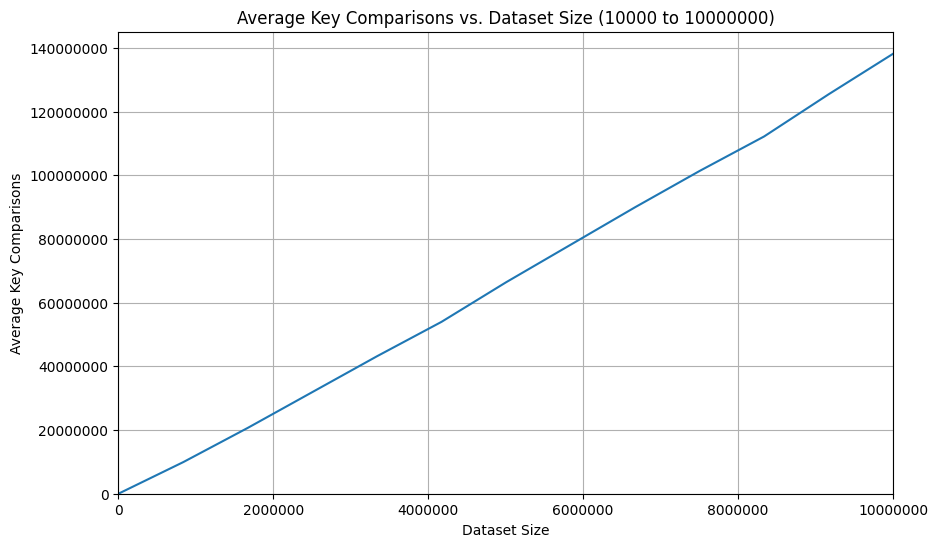

In [31]:
#

#, marker='o', linestyle='-'
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, avg_comparison_counts)
plt.title('Average Key Comparisons vs. Dataset Size (10000 to 10000000)')
plt.xlabel('Dataset Size')
plt.ylabel('Average Key Comparisons')
plt.ticklabel_format(style = 'plain')
plt.xlim([0,10000000])
plt.ylim(bottom = 0)
plt.grid(True)
plt.show()

